In [155]:
import torch
import torch.utils.data.dataset as dts
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn

In [156]:
from sklearn.datasets import load_diabetes

In [186]:
diab = load_diabetes()

In [187]:
x = torch.from_numpy(diab.data)
y = torch.from_numpy(diab.target)

In [188]:
x[0]

tensor([ 0.0381,  0.0507,  0.0617,  0.0219, -0.0442, -0.0348, -0.0434, -0.0026,
         0.0199, -0.0176], dtype=torch.float64)

In [189]:
x = x.type(torch.float32)
y = y.type(torch.float32)

In [190]:
print(x.size(), y.size())

torch.Size([442, 10]) torch.Size([442])


In [191]:
y = y.view(-1, 1)

In [192]:
print(x.size(), y.size())

torch.Size([442, 10]) torch.Size([442, 1])


In [193]:
x_train, y_train, x_test, y_test = x[:400], y[:400], x[400:], y[400:]

In [194]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

torch.Size([400, 10]) torch.Size([400, 1]) torch.Size([42, 10]) torch.Size([42, 1])


In [195]:
# initialie the weights and bias
w = torch.randn((x.size()[1], 1), requires_grad=True)
b = torch.randn(y.size()[1], requires_grad=True)

In [196]:
print(w.shape, b.shape)

torch.Size([10, 1]) torch.Size([1])


In [197]:
def forward(x):
    return x@w + b

In [198]:
def mse(t1, t2):
    diff = t1 - t2
    return torch.sum(diff * diff) / diff.numel()

In [206]:
Loss = []
max_itr = 5000
lr = 0.03
for epoch in range(max_itr):
    
    #
    y_pred = forward(x_train)
    
    # calculate the loss
    loss = mse(y_train, y_pred)
    
    # backpropagate  loss
    loss.backward()
    
    Loss.append(loss.item())
    with torch.no_grad():
        w -= lr*w.grad
        b -= lr*b.grad
        w.grad.zero_()
        b.grad.zero_()

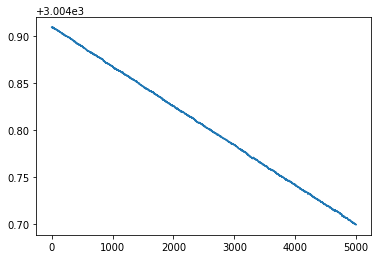

In [207]:
plt.plot(Loss)

In [208]:
forward(x_test)[:5]

tensor([[183.3710],
        [ 90.6992],
        [147.8313],
        [251.5996],
        [198.8614]], grad_fn=<SliceBackward>)

In [209]:
y_test[:5]

tensor([[175.],
        [ 93.],
        [168.],
        [275.],
        [293.]])